In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np
from scipy.interpolate import interp1d
import os

In [10]:
list_df = [] # List of tuples (encoder, acelerometer) dfs
measures_path = './mediciones'
for idx, csv_file in enumerate(os.listdir(measures_path)):
    encoder_filename = f'encoder_{idx}.csv'
    acelerometer_filename = f'acelerometer_{idx}.csv'

    full_encoder_path = os.path.join(measures_path, encoder_filename)
    full_acelerometer_path = os.path.join(measures_path, acelerometer_filename)

    if os.path.isfile(full_encoder_path) and os.path.isfile(full_acelerometer_path):
        encoder_df = pd.read_csv(full_encoder_path)
        acelerometer_df = pd.read_csv(full_acelerometer_path)
        df_tuple = (encoder_df, acelerometer_df)
        list_df.append(df_tuple)


#encoder_1 = pd.read_csv('./mediciones/encoder.csv')
#acelerometro_1 = pd.read_csv('./mediciones/acelerometer.csv')

print(list_df)

[(     13:39:04:075     0  15269079  0.04  0.07    1.9  Unnamed: 6  Unnamed: 7  \
0    13:39:04:078    10  15309316  0.12  0.14   2.76         NaN         NaN   
1    13:39:04:080    20  15326830  0.18  0.20   2.85         NaN         NaN   
2    13:39:04:082    30  15338821  0.22  0.24   6.14         NaN         NaN   
3    13:39:04:085    40  15348778  0.27  0.29   4.23         NaN         NaN   
4    13:39:04:087    50  15357078  0.32  0.33   4.11         NaN         NaN   
..            ...   ...       ...   ...   ...    ...         ...         ...   
154  13:39:04:479  1550  15767221  0.61  0.58 -16.66         NaN         NaN   
155  13:39:04:482  1560  15771201  0.55  0.52 -15.48         NaN         NaN   
156  13:39:04:484  1570  15775653  0.50  0.48  -9.71         NaN         NaN   
157  13:39:04:487  1580  15780531  0.43  0.39 -18.35         NaN         NaN   
158  13:39:04:490  1590  15786420  0.35  0.33  -7.86         NaN         NaN   

     Unnamed: 8 Unnamed: 9 Unnamed: 1

In [11]:
extended_df = []

for idx, df in enumerate(list_df):
    encoder_times = df[0].iloc[:, 2].astype(int)
    encoder_accel = df[0].iloc[:, 5]
    encoder_vel = df[0].iloc[:, 3]
    acelerometer_times = df[1].iloc[:, 1].astype(int)
    acelerometer_accel = df[1].iloc[:, 2]

    # Limpieza rápida de datos
    print(f"Limpando los encoder de índice {idx}")
    print("Valores nulos en cada columna:")
    print(df[0].iloc[20:, [2, 3, 5]].isna().sum())
    
    print(f"Longitud de encoder_times: {len(encoder_times)}")
    print(f"Longitud de encoder_vel: {len(encoder_vel)}")
    print(f"Longitud de encoder_accel: {len(encoder_accel)}")
    
    # Filtrar filas con valores nulos
    encoder_clean = df[0].iloc[:, [2, 3, 5]].dropna()
    
    # Extraer los datos limpios
    encoder_times = encoder_clean.iloc[:, 0].astype(int).reset_index(drop=True)
    encoder_vel = encoder_clean.iloc[:, 1].reset_index(drop=True)
    encoder_accel = encoder_clean.iloc[:, 2].reset_index(drop=True)

    # Verificar las longitudes después de la limpieza
    print(f"Longitud después de la limpieza - encoder_times: {len(encoder_times)}")
    print(f"Longitud después de la limpieza - encoder_vel: {len(encoder_vel)}")
    print(f"Longitud después de la limpieza - encoder_accel: {len(encoder_accel)}")

    # Asegurar que todas las columnas tengan la misma longitud mínima
    #min_length = min(len(encoder_times), len(encoder_vel), len(encoder_accel), len(acelerometer_times), len(acelerometer_accel))
    #encoder_times = encoder_times[:min_length]
    #encoder_vel = encoder_vel[:min_length]
    #encoder_accel = encoder_accel[:min_length]
    #acelerometer_times = acelerometer_times[:min_length]
    #acelerometer_accel = acelerometer_accel[:min_length]

    # Crear DataFrame con columnas de longitud igual
    df_clean = {
        'encoder_times': encoder_times,
        'encoder_accel': encoder_accel,
        'encoder_vel':encoder_vel,
        'acelerometer_times': acelerometer_times,
        'acelerometer_accel': acelerometer_accel
    }

    # Añadir el DataFrame limpio a la lista
    extended_df.append(df_clean)


#encoder_times = encoder_1.iloc[:,2].astype(int)
#encoder_accel = encoder_1.iloc[:,5]
#encoder_vel = encoder_1.iloc[:,3]

#acelerometer_times = acelerometro_1.iloc[:,1].astype(int)
#acelerometer_accel = acelerometro_1.iloc[:,2]

Limpando los encoder de índice 0
Valores nulos en cada columna:
15269079    0
0.04        0
1.9         0
dtype: int64
Longitud de encoder_times: 159
Longitud de encoder_vel: 159
Longitud de encoder_accel: 159
Longitud después de la limpieza - encoder_times: 159
Longitud después de la limpieza - encoder_vel: 159
Longitud después de la limpieza - encoder_accel: 159


In [12]:
for index, diccionario in enumerate(extended_df):
    print(f'Diccionario {index + 1}:')
    for clave, valor in diccionario.items():
        print(f'  Clave: {clave}, Tipo de valor: {type(valor)}, Valor: {valor}')

Diccionario 1:
  Clave: encoder_times, Tipo de valor: <class 'pandas.core.series.Series'>, Valor: 0      15309316
1      15326830
2      15338821
3      15348778
4      15357078
         ...   
154    15767221
155    15771201
156    15775653
157    15780531
158    15786420
Name: 15269079, Length: 159, dtype: int64
  Clave: encoder_accel, Tipo de valor: <class 'pandas.core.series.Series'>, Valor: 0       2.76
1       2.85
2       6.14
3       4.23
4       4.11
       ...  
154   -16.66
155   -15.48
156    -9.71
157   -18.35
158    -7.86
Name: 1.9, Length: 159, dtype: float64
  Clave: encoder_vel, Tipo de valor: <class 'pandas.core.series.Series'>, Valor: 0      0.12
1      0.18
2      0.22
3      0.27
4      0.32
       ... 
154    0.61
155    0.55
156    0.50
157    0.43
158    0.35
Name: 0.04, Length: 159, dtype: float64
  Clave: acelerometer_times, Tipo de valor: <class 'pandas.core.series.Series'>, Valor: 0      12580043
1      12586358
2      12592520
3      12599255
4      1260459

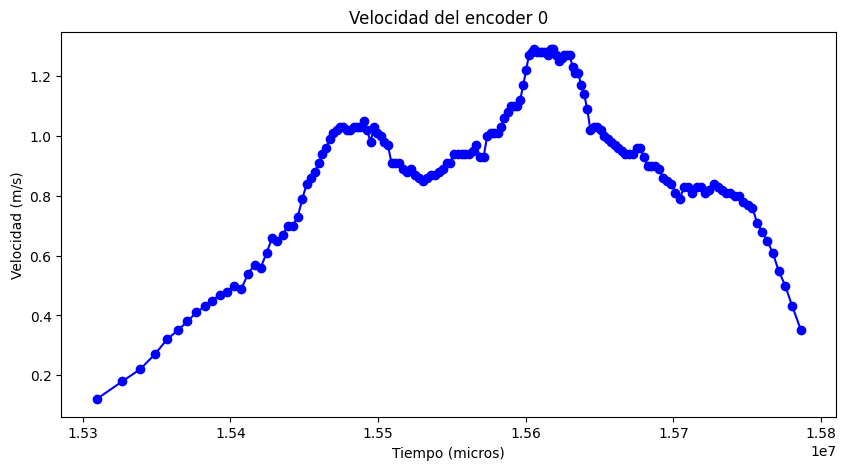

In [13]:

def graph_encoder_vel(idx, df):
    # Graficar la velocidad
    plt.figure(figsize=(10, 5))
    plt.plot(df['encoder_times'], df['encoder_vel'], marker='o', linestyle='-', color='blue')
    plt.title(f'Velocidad del encoder {idx}')
    plt.xlabel('Tiempo (micros)')
    plt.ylabel('Velocidad (m/s)')
    plt.show()

for idx, df in enumerate(extended_df):
    graph_encoder_vel(idx, df)


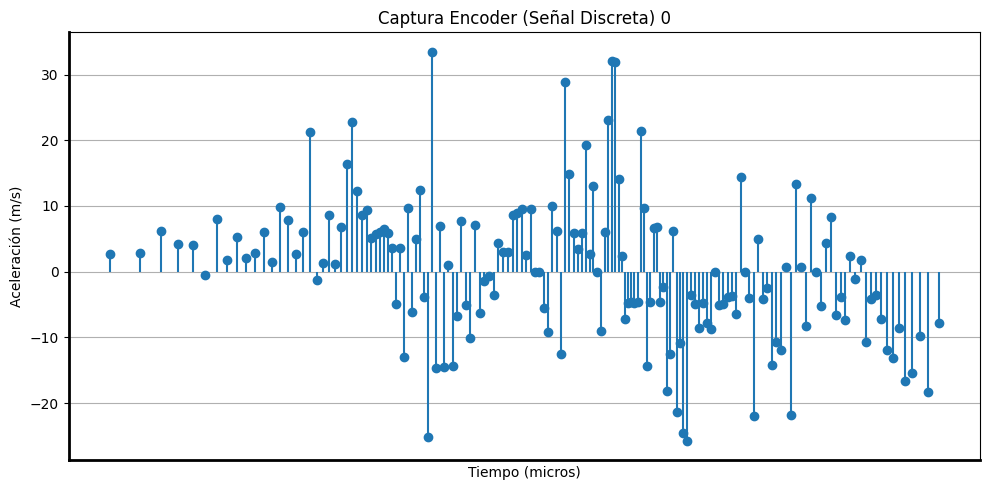

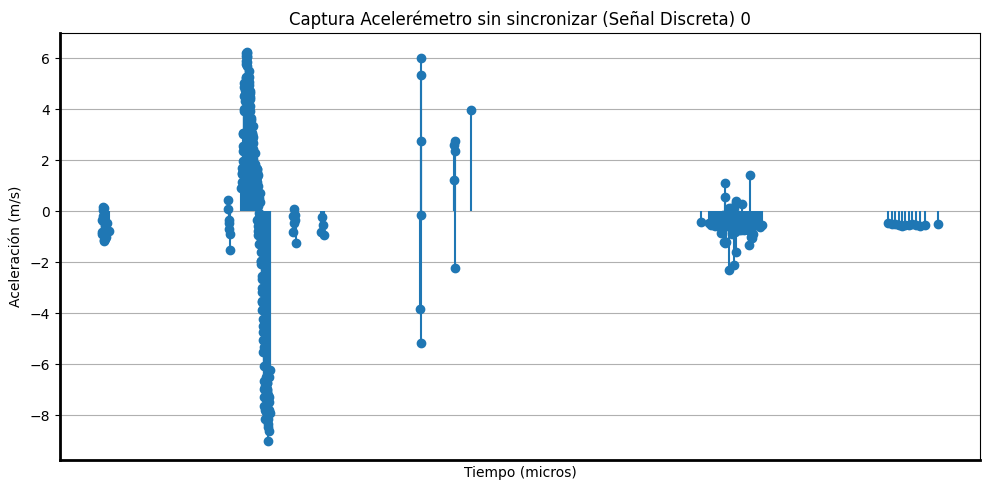

In [14]:

def graph_raw_datasets(df, idx):
    plt.figure(figsize=(10, 5))
    plt.stem(df['encoder_times'], df['encoder_accel'], basefmt=" ")
    plt.title(f'Captura Encoder (Señal Discreta) {idx}')
    plt.xlabel('Tiempo (micros)')
    plt.ylabel('Aceleración (m/s)')
    plt.grid()
    
    # Resaltar los ejes
    ax = plt.gca()  # Obtener el eje actual
    ax.spines['bottom'].set_linewidth(2)  # Grosor del eje x
    ax.spines['left'].set_linewidth(2)    # Grosor del eje y
    plt.xticks([]) 
    # Cambiar color de los ejes
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    plt.stem(df['acelerometer_times'], df['acelerometer_accel'], basefmt=" ")
    plt.title(f'Captura Acelerémetro sin sincronizar (Señal Discreta) {idx}')
    plt.xlabel('Tiempo (micros)')
    plt.ylabel('Aceleración (m/s)')
    plt.grid()
    
    # Resaltar los ejes
    ax = plt.gca()  # Obtener el eje actual
    ax.spines['bottom'].set_linewidth(2)  # Grosor del eje x
    ax.spines['left'].set_linewidth(2)    # Grosor del eje y
    plt.xticks([]) 
    # Cambiar color de los ejes
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    
    plt.tight_layout()
    plt.show()

for idx, df in enumerate(extended_df):
    graph_raw_datasets(df, idx)


In [18]:
def expand_acelerometer(df, idx):
    # Asegúrate de que encoder_times sea una Serie de Pandas de enteros
    encoder_times = df['encoder_times']
    acelerometer_times = df['acelerometer_times']
    
    # Inicializar start_idx y end_idx
    start_idx = -1
    end_idx = -1

    # Encontrar el índice de inicio
    for enc_time in encoder_times:
        for idx, ac_time in enumerate(acelerometer_times):
            if ac_time >= enc_time:
                start_idx = idx
                print("Tiempo del codificador:", enc_time)
                print("Tiempo del acelerómetro:", ac_time)
                break  # Salir del bucle interno
        if start_idx != -1:  # Salir del bucle externo si se encontró el índice
            break
    
    # Verificar si se encontró un índice de inicio
    if start_idx != -1:
        print("El tiempo de comienzo en el acelerómetro es:", start_idx)
        # Corta acelerómetro hasta start_idx
        df['acelerometer_times'] = df['acelerometer_times'].iloc[start_idx:]
        df['acelerometer_accel'] = df['acelerometer_accel'].iloc[start_idx:]
    else:
        print("No se encontró un índice de inicio válido.")
    
    # Obtener el último tiempo del codificador
    last_enc_val = encoder_times.iloc[-1]
    print("Último tiempo del encoder:", last_enc_val)
    
    # Encontrar el índice de final
    for idx, ac_time in enumerate(acelerometer_times):
        if last_enc_val <= ac_time:
            end_idx = idx
            print("Último tiempo del codificador:", last_enc_val)
            print("Tiempo del acelerómetro:", ac_time)
            break
    
    # Verificar si se encontró un índice de final
    if end_idx != -1:
        print("El tiempo de final en el acelerómetro es:", end_idx)
        # Corta acelerómetro hasta end_idx
        df['acelerometer_times'] = df['acelerometer_times'].iloc[:end_idx]
        df['acelerometer_accel'] = df['acelerometer_accel'].iloc[:end_idx]
    else:
        print("No se encontró un índice de final válido.")

# Aplicar la función a cada DataFrame en extended_df
for idx, df in enumerate(extended_df):
    expand_acelerometer(df, idx)



Tiempo del codificador: 15309316
Tiempo del acelerómetro: 15309316
El tiempo de comienzo en el acelerómetro es: 0
Último tiempo del encoder: 15786420
Último tiempo del codificador: 15786420
Tiempo del acelerómetro: 15788400
El tiempo de final en el acelerómetro es: 158


## Grraphs already clean

In [19]:
#encoder_times = encoder_1.iloc[:, 2].astype(int)
#encoder_accel = encoder_1.iloc[:,5]

#acelerometer_times = acelerometro_1.iloc[:,1].astype(int)
#acelerometer_accel = acelerometro_1.iloc[:,2]

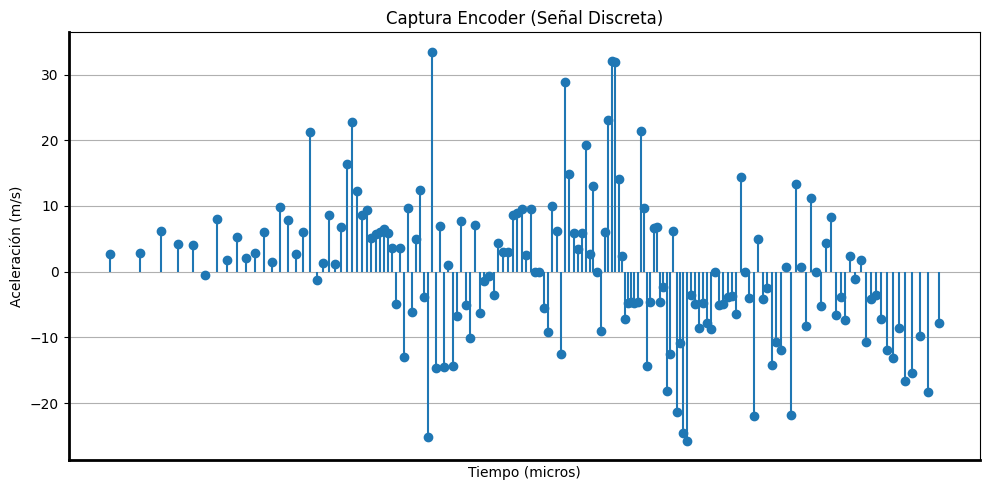

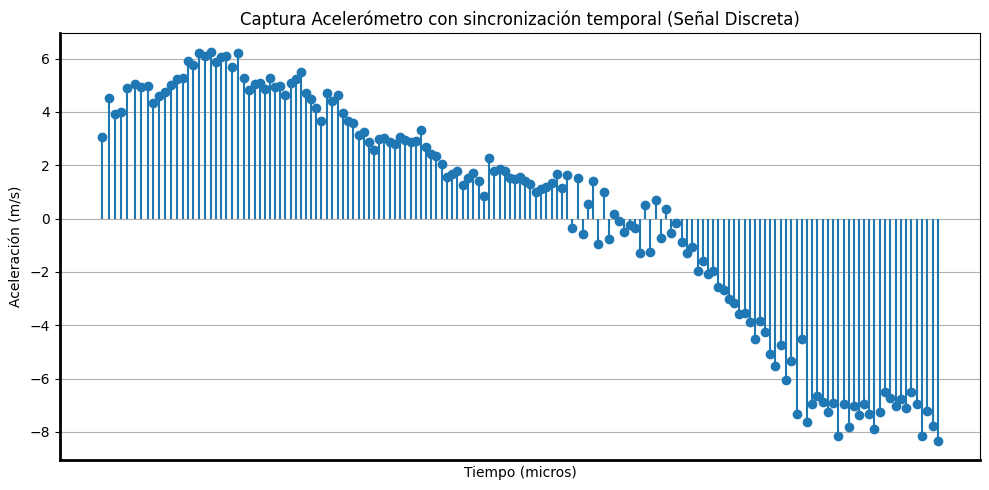

In [20]:
def expand_acelerometer(df, idx):
    plt.figure(figsize=(10, 5))
    plt.stem(df['encoder_times'], df['encoder_accel'], basefmt=" ")
    plt.title('Captura Encoder (Señal Discreta)')
    plt.xlabel('Tiempo (micros)')
    plt.ylabel('Aceleración (m/s)')
    plt.grid()
    
    # Resaltar los ejes
    ax = plt.gca()  # Obtener el eje actual
    ax.spines['bottom'].set_linewidth(2)  # Grosor del eje x
    ax.spines['left'].set_linewidth(2)    # Grosor del eje y
    plt.xticks([]) 
    # Cambiar color de los ejes
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    plt.stem(df['acelerometer_times'], df['acelerometer_accel'], basefmt=" ")
    plt.title('Captura Acelerómetro con sincronización temporal (Señal Discreta)')
    plt.xlabel('Tiempo (micros)')
    plt.ylabel('Aceleración (m/s)')
    plt.grid()
    
    # Resaltar los ejes
    ax = plt.gca()  # Obtener el eje actual
    ax.spines['bottom'].set_linewidth(2)  # Grosor del eje x
    ax.spines['left'].set_linewidth(2)    # Grosor del eje y
    plt.xticks([]) 
    # Cambiar color de los ejes
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    
    plt.tight_layout()
    plt.show()


for idx, df in enumerate(extended_df):
    expand_acelerometer(df, idx)

In [48]:
acelerometer_accel_np = acelerometer_accel.to_numpy()
acelerometer_times_np = acelerometer_times.to_numpy()


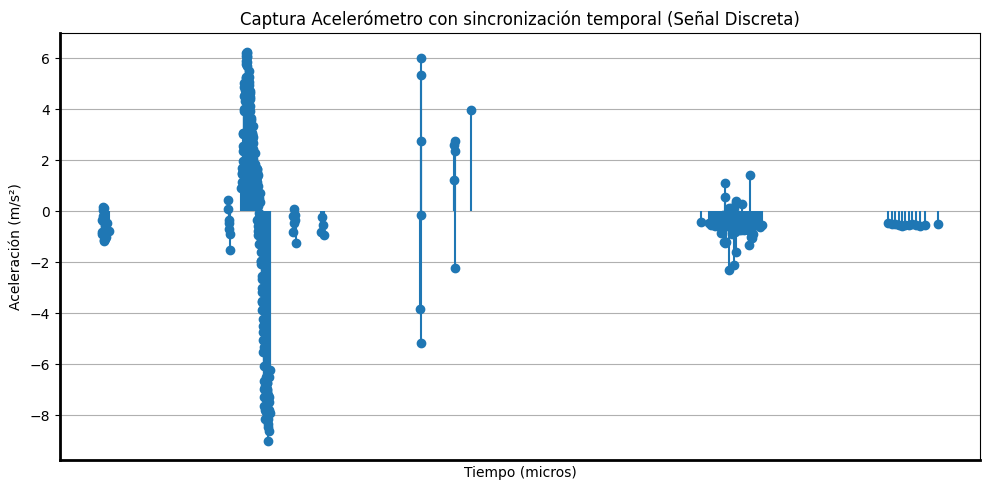

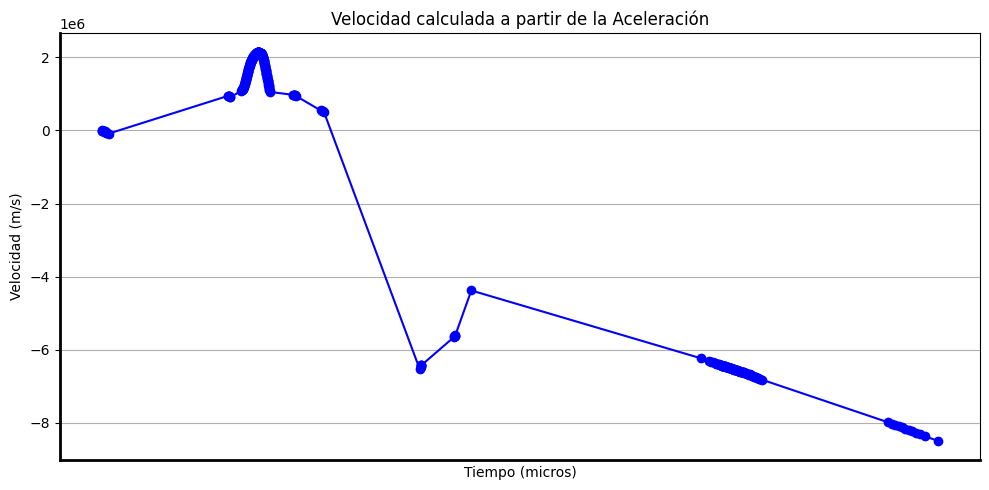

In [49]:
# Calcular los delta_t (diferencia entre tiempos consecutivos)
delta_t = np.diff(acelerometer_times_np, prepend=acelerometer_times_np[0])

# Integración discreta para obtener la velocidad
# La velocidad inicial se puede establecer en 0 o en el valor que consideres adecuado
velocidad_inicial = 0
velocidad = np.cumsum(acelerometer_accel_np * delta_t) + velocidad_inicial

# Graficar la aceleración
plt.figure(figsize=(10, 5))
plt.stem(acelerometer_times, acelerometer_accel, basefmt=" ")
plt.title('Captura Acelerómetro con sincronización temporal (Señal Discreta)')
plt.xlabel('Tiempo (micros)')
plt.ylabel('Aceleración (m/s²)')
plt.grid()

# Resaltar los ejes
ax = plt.gca()  # Obtener el eje actual
ax.spines['bottom'].set_linewidth(2)  # Grosor del eje x
ax.spines['left'].set_linewidth(2)    # Grosor del eje y
plt.xticks([]) 
# Cambiar color de los ejes
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.tight_layout()
plt.show()

# Graficar la velocidad
plt.figure(figsize=(10, 5))
plt.plot(acelerometer_times_np, velocidad, marker='o', linestyle='-', color='blue')
plt.title('Velocidad calculada a partir de la Aceleración')
plt.xlabel('Tiempo (micros)')
plt.ylabel('Velocidad (m/s)')
plt.grid()

# Resaltar los ejes
ax = plt.gca()  # Obtener el eje actual
ax.spines['bottom'].set_linewidth(2)  # Grosor del eje x
ax.spines['left'].set_linewidth(2)    # Grosor del eje y
plt.xticks([]) 
# Cambiar color de los ejes
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.tight_layout()
plt.show()

In [11]:
velocidad
total_vel = np.sum(velocidad)
print(total_vel)
total_time = acelerometer_times_np[-1] - acelerometer_times_np[0]

print(total_time)

104636609.98999998
475850


In [12]:
total_time = acelerometer_times_np[-1] - acelerometer_times_np[0]
total_vel = np.sum(velocidad)

vel_media = total_vel / total_time
print(vel_media)

219.8941052642639


In [13]:
# Sumar las velocidades
total_vel = np.sum(velocidad)
print(f"Distancia total (suma de velocidades): {total_vel} m")

# Calcular el tiempo total
total_time = acelerometer_times_np[-1] - acelerometer_times_np[0]
print(f"Tiempo total: {total_time} s")

# Calcular el valor medio de la velocidad
valor_medio_velocidad = total_vel / total_time
print(f"Valor medio de la velocidad: {valor_medio_velocidad} m/s")

Distancia total (suma de velocidades): 104636609.98999998 m
Tiempo total: 475850 s
Valor medio de la velocidad: 219.8941052642639 m/s


# NEURAL ALGORITHM

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from collections import Counter

import math
import numpy as np
import re
import os
from torch.nn.utils.rnn import pad_sequence


os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

torch.manual_seed(23)

def check_gpu():
    if torch.cuda.is_available():
        print("CUDA está disponible.")
        print(f"Hay {torch.cuda.device_count()} GPU(s) disponible(s).")
        for i in range(torch.cuda.device_count()):
            print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    else:
        print("CUDA no está disponible. No hay GPU accesible.")

check_gpu()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')

CUDA está disponible.
Hay 1 GPU(s) disponible(s).
GPU 0: NVIDIA GeForce RTX 2060


In [19]:
MAX_SEQ_LEN =  len(encoder_times) # max num of velocity instants

In [20]:
class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_seq_len = MAX_SEQ_LEN):
        super().__init__()
        self.pos_embed_matrix = torch.zeros(max_seq_len, d_model, device=device)
        token_pos = torch.arange(0, max_seq_len, dtype = torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() 
                             * (-math.log(10000.0)/d_model))
        self.pos_embed_matrix[:, 0::2] = torch.sin(token_pos * div_term)
        self.pos_embed_matrix[:, 1::2] = torch.cos(token_pos * div_term)
        self.pos_embed_matrix = self.pos_embed_matrix.unsqueeze(0).transpose(0,1)
        
    def forward(self, x):
#         print(self.pos_embed_matrix.shape)
#         print(x.shape)
        return x + self.pos_embed_matrix[:x.size(0), :]

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model = 512, num_heads = 8):
        super().__init__()
        assert d_model % num_heads == 0, 'Embedding size not compatible with num heads'
        
        self.d_v = d_model // num_heads
        self.d_k = self.d_v
        self.num_heads = num_heads
        
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)
        
    def forward(self, Q, K, V, mask = None):
        batch_size = Q.size(0)
        '''
        Q, K, V -> [batch_size, seq_len, num_heads*d_k]
        after transpose Q, K, V -> [batch_size, num_heads, seq_len, d_k]
        '''
        Q = self.W_q(Q).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2 )
        K = self.W_k(K).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2 )
        V = self.W_v(V).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2 )
        
        weighted_values, attention = self.scale_dot_product(Q, K, V, mask)
        weighted_values = weighted_values.transpose(1, 2).contiguous().view(batch_size, -1, self.num_heads*self.d_k)
        weighted_values = self.W_o(weighted_values)
        
        return weighted_values, attention
        
        
    def scale_dot_product(self, Q, K, V, mask = None):
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)
        attention = F.softmax(scores, dim = -1)
        weighted_values = torch.matmul(attention, V)
        
        return weighted_values, attention
        

class PositionFeedForward(nn.Module):
    def __init__(self, d_model, d_ff):
        super().__init__()
        self.linear1 = nn.Linear(d_model, d_ff)
        self.linear2 = nn.Linear(d_ff, d_model)
        
    def forward(self, x):
        return self.linear2(F.relu(self.linear1(x)))
    
class EncoderSubLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout = 0.1):
        super().__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.ffn = PositionFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.droupout1 = nn.Dropout(dropout)
        self.droupout2 = nn.Dropout(dropout)
    
    def forward(self, x, mask = None):
        attention_score, _ = self.self_attn(x, x, x, mask)
        x = x + self.droupout1(attention_score)
        x = self.norm1(x)
        x = x + self.droupout2(self.ffn(x))
        return self.norm2(x)

class Encoder(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, num_layers, dropout=0.1):
        super().__init__()
        self.layers = nn.ModuleList([EncoderSubLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.norm = nn.LayerNorm(d_model)
    def forward(self, x, mask=None):
        for layer in self.layers:
            x = layer(x, mask)
        return self.norm(x)

class DecoderSubLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super().__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.cross_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)
        self.dropout3 = nn.Dropout(dropout)
        
    def forward(self, x, encoder_output, target_mask=None, encoder_mask=None):
        attention_score, _ = self.self_attn(x, x, x, target_mask)
        x = x + self.dropout1(attention_score)
        x = self.norm1(x)
        
        encoder_attn, _ = self.cross_attn(x, encoder_output, encoder_output, encoder_mask)
        x = x + self.dropout2(encoder_attn)
        x = self.norm2(x)
        
        ff_output = self.feed_forward(x)
        x = x + self.dropout3(ff_output)
        return self.norm3(x)
        
class Decoder(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, num_layers, dropout=0.1):
        super().__init__()
        self.layers = nn.ModuleList([DecoderSubLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.norm = nn.LayerNorm(d_model)
        
    def forward(self, x, encoder_output, target_mask, encoder_mask):
        for layer in self.layers:
            x = layer(x, encoder_output, target_mask, encoder_mask)
        return self.norm(x)

In [21]:
class Transformer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, num_layers,
                 input_vocab_size, max_len=MAX_SEQ_LEN, dropout=0.1):
        super().__init__()
        self.encoder_embedding = nn.Embedding(input_vocab_size, d_model)
        self.pos_embedding = PositionalEmbedding(d_model, max_len)
        self.encoder = Encoder(d_model, num_heads, d_ff, num_layers, dropout)
        self.sep_token_id = 2

        # Embeddings
        self._cached_source_embeddings = None
        self._all_embeddings = None
        
    def forward(self, source):
        # Encoder mask
        source_mask = self.mask(source)
        # Embedding and positional Encoding
        source = self.encoder_embedding(source) * math.sqrt(self.encoder_embedding.embedding_dim)
        self._cached_source_embeddings = source
        source = self.pos_embedding(source)
        # Encoder
        encoder_output = self.encoder(source, source_mask)
        
        return encoder_output
        
    def get_embeddings(self):
        if self._all_embeddings is None:
            raise ValueError("Embeddings not computed yet. Call forward() first.")
        return self._all_embeddings
    
    def mask(self, source):
        source_mask = (source != 0).unsqueeze(1).unsqueeze(2)
        
        if self.sep_token_id is not None:
            seq_len = source.size(1)
            sep_positions = (source == self.sep_token_id).nonzero(as_tuple=True)[1]
            
            attention_block_mask = torch.ones(seq_len, seq_len, dtype=torch.bool, device=source.device)

            last_sep_pos = -1
            for sep_pos in sep_positions:
                attention_block_mask[last_sep_pos + 1 : sep_pos, last_sep_pos + 1 : sep_pos] = 0
                last_sep_pos = sep_pos

            source_mask = source_mask & attention_block_mask.unsqueeze(0).unsqueeze(0)

        return source_mask

        

## SMALL TEST

In [43]:
seq_len_source = MAX_SEQ_LEN
seq_len_target = MAX_SEQ_LEN
batch_size = 2
input_vocab_size = 50
#target_vocab_size = len(encoder_vel.unique())

# Cambiar el rango a (0, input_vocab_size) para seleccionar valores del vocabulario
source = torch.randint(1, input_vocab_size, (batch_size, seq_len_source))


d_model = 512
num_heads = 8
d_ff = 2048
num_layers = 6

model = Transformer(d_model, num_heads, d_ff, num_layers,
                   input_vocab_size, max_len=MAX_SEQ_LEN, dropout=0.1)


model = model.to(device)
source = source.to(device)

output = model(source)
#Expected output shape -> [batch, seq_len_target, target_vocab_size] i.e [2, 10, 50]
print(f'output.shape {output.shape}')
print(source)



output.shape torch.Size([2, 159, 512])
tensor([[29, 14,  3, 10, 11, 11,  4, 42, 40, 44, 49,  2, 25, 28, 27,  1, 35, 23,
          9, 47, 14, 12,  9,  7, 25, 42, 19, 45,  9,  2, 49, 43, 22, 22, 37, 49,
         43, 45, 27, 18, 15, 45, 21,  8,  7, 12, 47, 39,  7, 32, 34, 13, 44, 10,
         47,  4, 14, 45, 28, 48, 20, 33, 42, 16, 17, 49, 28, 11, 25, 49,  8, 11,
         12,  7, 39, 30, 39, 39, 47, 29,  9, 21,  7, 20, 16, 25,  9, 49, 38, 36,
         18, 49,  9, 34, 24, 27,  3, 47, 12, 42, 25,  2,  8, 48,  1, 35,  1, 32,
         28, 19, 41,  9, 24, 35, 23, 39,  6, 17, 32, 12, 12, 15, 35, 35, 34, 28,
         40, 13, 29, 27, 48,  5,  7, 43, 11, 45, 26, 48,  3, 11, 37, 47, 33, 21,
         16, 41, 18,  1, 25, 11, 23, 11, 32, 21, 10, 43, 39, 39, 19],
        [17, 49, 49, 12, 24,  1, 23, 36, 31, 26, 40,  6, 10, 40, 25, 40, 45, 13,
         15,  7, 31,  8, 25, 31, 13, 42, 27, 10, 28, 31,  3, 10, 22, 33, 12, 25,
          9, 14, 46, 22, 34, 47, 48, 22, 34, 17, 27, 32,  9, 46, 37, 26, 19, 32,


## Train

In [46]:
def train_transformer(model, optimizer, criterion, source, target, num_epochs=10):
    model.train()  # Modo de entrenamiento
    for epoch in range(num_epochs):
        # Pasa los datos por el modelo (forward pass)
        output = model(source)  # Output del modelo [batch_size, seq_len, target_vocab_size]
        
        # Cambiar la forma del output para la función de pérdida: 
        # Debe estar en el formato [batch_size * seq_len, target_vocab_size]
        output = output.view(-1, output.shape[-1])
        
        # También ajustar la forma del target (verdadero valor) para que sea [batch_size * seq_len]
        target = target.view(-1)
        
        # Calcular la pérdida entre las predicciones y los valores esperados
        loss = criterion(output, target)
        
        # Resetear los gradientes antes de la retropropagación
        optimizer.zero_grad()
        
        # Realizar la retropropagación para calcular los gradientes
        loss.backward()
        
        # Optimizar los parámetros del modelo
        optimizer.step()
        
        # Imprimir la pérdida en cada época
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [47]:
seq_len_source = MAX_SEQ_LEN
seq_len_target = MAX_SEQ_LEN
batch_size = 2
input_vocab_size = 50
target_vocab_size = len(encoder_vel.unique())
d_model = 512
num_heads = 8
d_ff = 2048
num_layers = 6

# Crear las señales (entrada y objetivo)
source = torch.randint(1, input_vocab_size, (batch_size, seq_len_source))
target = torch.randint(1, target_vocab_size, (batch_size, seq_len_target))

# Crear el modelo
model = Transformer(d_model, num_heads, d_ff, num_layers, input_vocab_size, max_len=MAX_SEQ_LEN, dropout=0.1)
model = model.to(device)

# Definir el optimizador y el criterio de pérdida
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Pasar los datos al dispositivo (GPU/CPU)
source = source.to(device)
target = target.to(device)

# Llamar a la función de entrenamiento
train_transformer(model, optimizer, criterion, source, target, num_epochs=10)

Epoch [1/10], Loss: 6.7747
Epoch [2/10], Loss: 5.7392
Epoch [3/10], Loss: 4.9814
Epoch [4/10], Loss: 4.4753
Epoch [5/10], Loss: 4.1516
Epoch [6/10], Loss: 3.9295
Epoch [7/10], Loss: 3.7553
Epoch [8/10], Loss: 3.6832
Epoch [9/10], Loss: 3.5743
Epoch [10/10], Loss: 3.4191
